Decision Tree Regression Mean Squared Error: 243458456254369.4
Decision Tree Regression R-squared: -0.01373322307837288

Decision Tree Rules:
|--- Share of global plastics emitted to ocean <= 4.18
|   |--- Share of global plastics emitted to ocean <= 2.12
|   |   |--- MPA <= 40.88
|   |   |   |--- Share of global plastics emitted to ocean <= 0.18
|   |   |   |   |--- Share of global plastics emitted to ocean <= 0.00
|   |   |   |   |   |--- MPA <= 1.26
|   |   |   |   |   |   |--- MPA <= 0.55
|   |   |   |   |   |   |   |--- MPA <= 0.05
|   |   |   |   |   |   |   |   |--- MPA <= 0.01
|   |   |   |   |   |   |   |   |   |--- value: [37327.49]
|   |   |   |   |   |   |   |   |--- MPA >  0.01
|   |   |   |   |   |   |   |   |   |--- value: [1537842.00]
|   |   |   |   |   |   |   |--- MPA >  0.05
|   |   |   |   |   |   |   |   |--- Share of global plastics emitted to ocean <= 0.00
|   |   |   |   |   |   |   |   |   |--- MPA <= 0.20
|   |   |   |   |   |   |   |   |   |   |--- MPA <= 0.

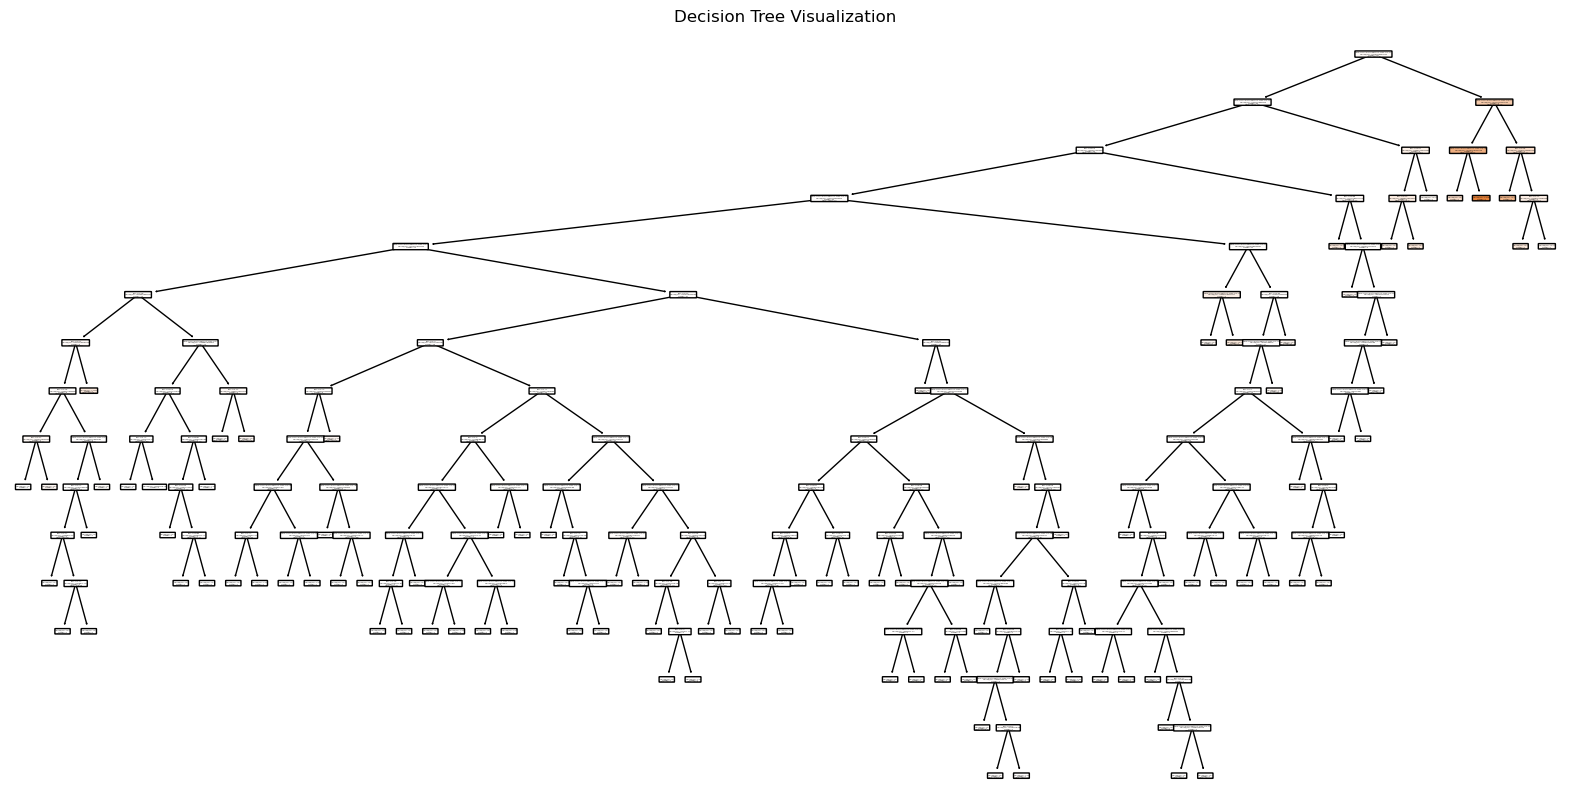

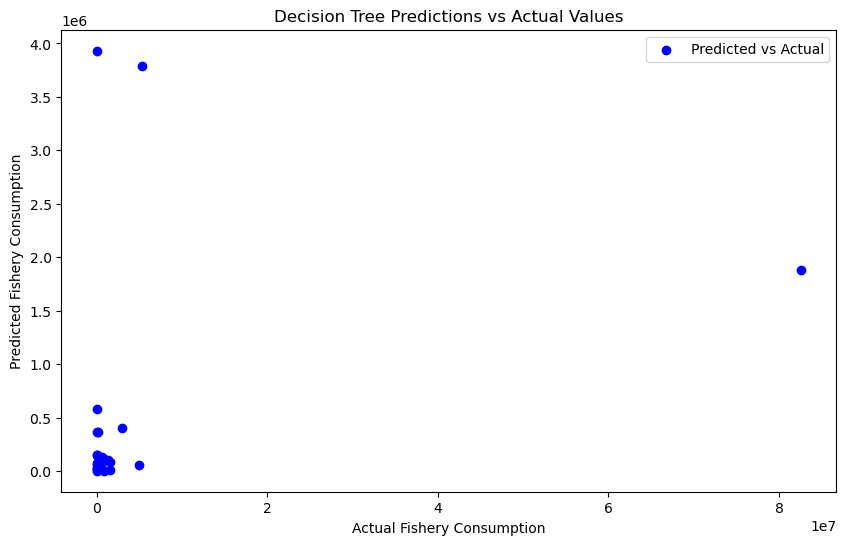

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv('input.csv')

# Select relevant columns and drop missing values
columns_of_interest = ['MPA', 'Share of global plastics emitted to ocean', 'FisheryConsumption']
df_subset = df[columns_of_interest].dropna()

# Define features and target
X = df_subset[['MPA', 'Share of global plastics emitted to ocean']]
y = df_subset['FisheryConsumption']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the Decision Tree Regressor
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

# Make predictions
y_pred = regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Decision Tree Regression Mean Squared Error: {mse}")
print(f"Decision Tree Regression R-squared: {r2}")

# Print the tree structure
tree_rules = export_text(regressor, feature_names=['MPA', 'Share of global plastics emitted to ocean'])
print("\nDecision Tree Rules:")
print(tree_rules)

# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(regressor, feature_names=['MPA', 'Share of global plastics emitted to ocean'], filled=True, rounded=True)
plt.title('Decision Tree Visualization')
plt.show()

# Visualize Predictions vs Actual Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.xlabel('Actual Fishery Consumption')
plt.ylabel('Predicted Fishery Consumption')
plt.title('Decision Tree Predictions vs Actual Values')
plt.legend()
plt.show()
